## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Visualising pairplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


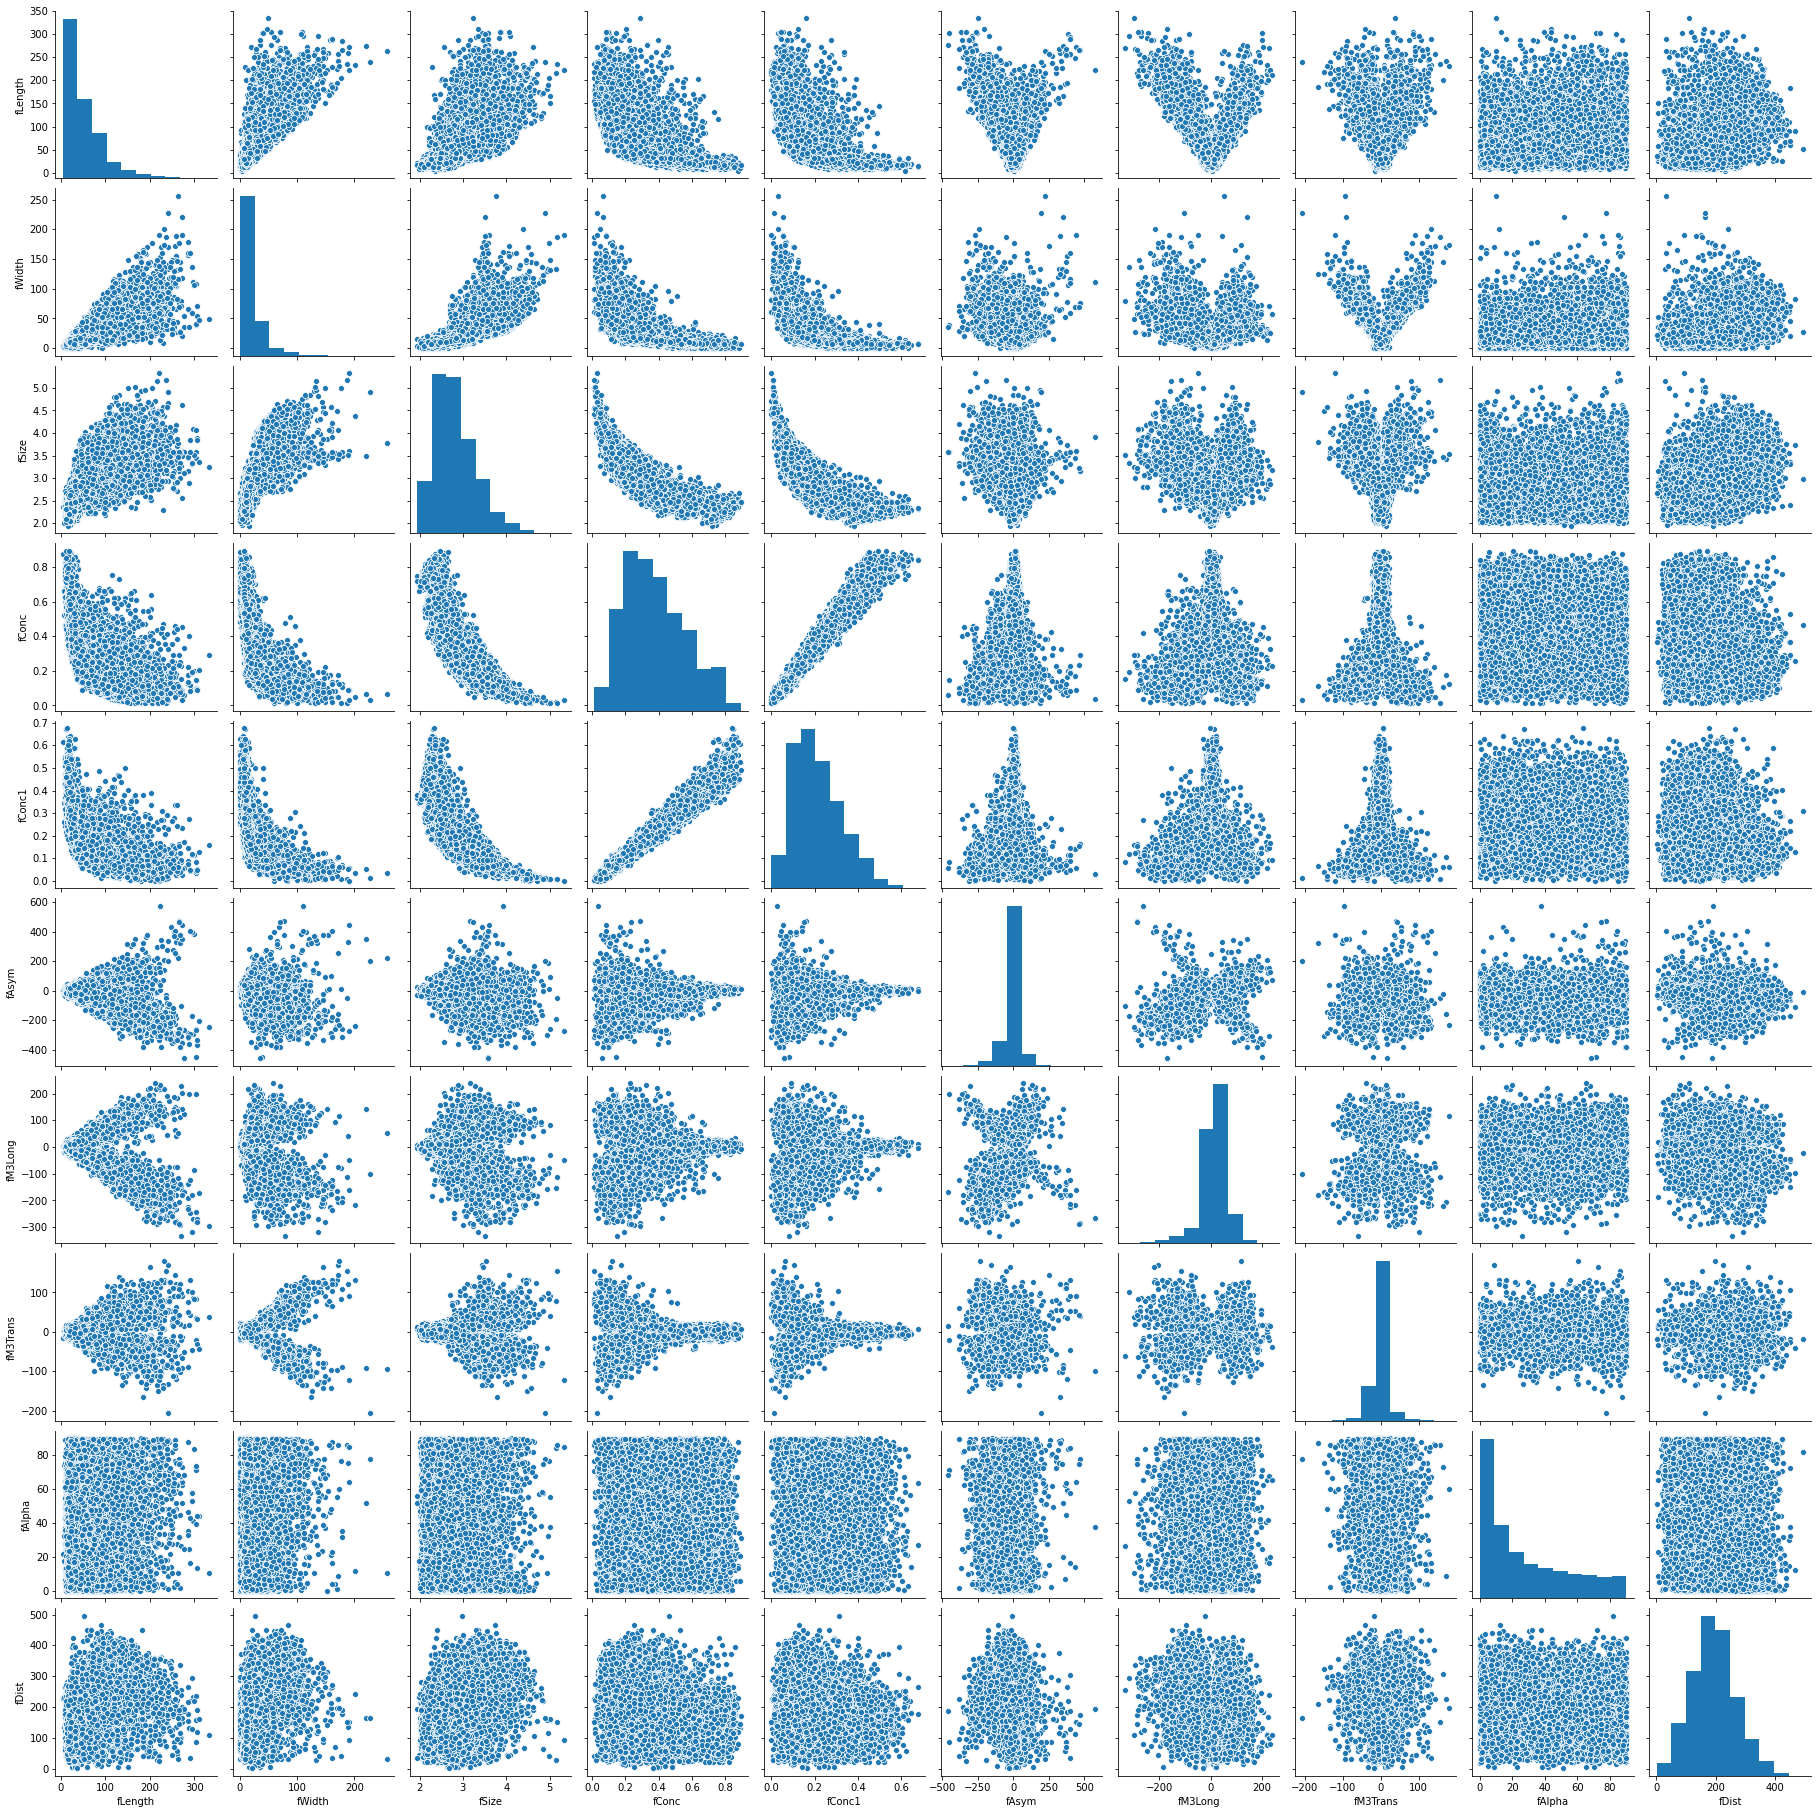

In [3]:
import seaborn as sns
df = dataset.copy()
sns.pairplot(data=df)

## Encoding dependent variable

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
print(X_train)

[[ 25.9857  18.4585   2.5231 ...  15.217   56.1948 190.33  ]
 [ 37.5265  21.7254   3.0988 ...   8.8451   7.3742 141.914 ]
 [ 58.8047  33.6055   3.5673 ...  26.5973   4.687  134.654 ]
 ...
 [ 35.8286  16.8952   2.8802 ...  11.3048   0.472  234.868 ]
 [ 20.0986  12.8671   2.4057 ...   7.875   21.675  212.098 ]
 [ 27.2726  12.6129   2.7288 ...  -9.9008   3.789  185.431 ]]


In [7]:
print(y_train)

[0 0 0 ... 0 0 0]


In [8]:
print(X_test)

[[ 17.1822  15.8933   2.4093 ...  -3.9904  66.9122  61.0713]
 [ 33.7228  18.2951   3.0639 ...  -4.4196  11.0782  94.1792]
 [ 61.3737  21.366    3.2621 ... -12.2608   0.9761 236.924 ]
 ...
 [ 42.8176  17.5801   2.6915 ... -12.3568   4.9361 125.49  ]
 [ 18.8943  15.4488   2.3757 ...   6.387    2.707  214.564 ]
 [ 72.6665  21.9177   3.4352 ...  11.2248   4.838  251.216 ]]


In [9]:
print(y_test)

[1 0 0 ... 0 0 0]


## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
print(X_train)

[[-0.63804528 -0.20286301 -0.63613186 ...  0.71422492  1.08910714
  -0.04395788]
 [-0.37000069 -0.02764681  0.58246569 ...  0.41054104 -0.77745557
  -0.69193922]
 [ 0.12420305  0.60952788  1.57415051 ...  1.25660847 -0.88019554
  -0.7891043 ]
 ...
 [-0.40943581 -0.2867087   0.11975    ...  0.52777    -1.04134804
   0.55212178]
 [-0.77477803 -0.50275094 -0.88463516 ...  0.3643062  -0.2306917
   0.24737676]
 [-0.60815597 -0.51638465 -0.20072189 ... -0.48288601 -0.91452886
  -0.10952423]]


In [12]:
print(X_test)

[[-0.84251383 -0.34044439 -0.87701496 ... -0.20119715  1.49886653
  -1.77390718]
 [-0.45834476 -0.21162677  0.50859205 ... -0.22165276 -0.63584018
  -1.33080364]
 [ 0.1838702  -0.04692279  0.92812659 ... -0.59536329 -1.02207474
   0.5796385 ]
 ...
 [-0.24711053 -0.24997493 -0.27967567 ... -0.59993863 -0.87067168
  -0.91175179]
 [-0.8027489  -0.3642846  -0.94813686 ...  0.29338833 -0.95589707
   0.28038076]
 [ 0.44615479 -0.01733303  1.29453138 ...  0.52395721 -0.87442235
   0.7709172 ]]


## Training the Random Forest Classification model on the Training set

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion ='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting a new result

In [14]:
print(classifier.predict(sc.transform([[31.6036, 11.7235, 2.5185, 0.5303, 0.3773, 26.2722, 23.8238, -9.9574, 6.3609, 205.261]])))

[0]


## Predicting the Test set results

In [15]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

[[2936  143]
 [ 401 1275]]
Accuracy: 88.56%


## Visualising predictions

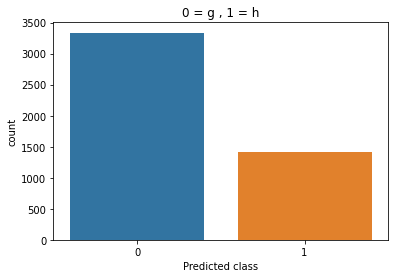

In [17]:
import seaborn as sns
sns.countplot(y_pred, data=dataset)
plt.title('0 = g , 1 = h')
plt.xlabel('Predicted class')
plt.show()

## Visualising real values

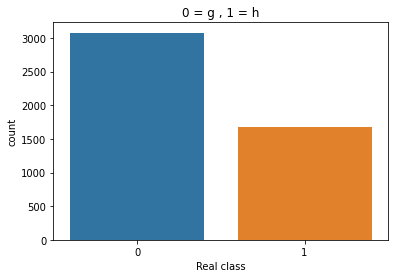

In [18]:
sns.countplot(y_test,  data=dataset)
plt.title('0 = g , 1 = h')
plt.xlabel('Real class')
plt.show()

## Visualising ROC curve

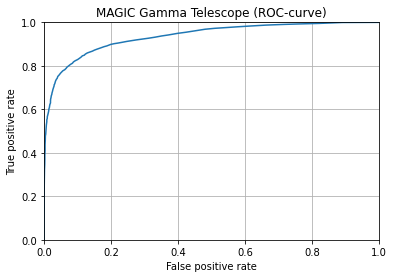

In [19]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=classifier.predict_proba(X_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('MAGIC Gamma Telescope (ROC-curve)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid(True)

## ROC curve accuracy

In [24]:
from sklearn.metrics import roc_auc_score
print("Accuracy: {:.2f}%".format(roc_auc_score(y_test,y_pred_prob_yes[:,1])*100))

Accuracy: 93.54%
